In [1]:
import matplotlib.pyplot as plt
import csv, glob, os

In [2]:
L_indices = [34]

In [3]:
problem_name = 'benchmark'
report_directories = ['../final_tests/Richards/dual_report_L_test', '../primal_report_L_test']

In [4]:
global_directoriess = [[ [os.path.join(base_directory, 'VART_' + str(L_index) + '_steps_' + str(id) + '_' + problem_name + '_L_test_LSCHEME') for id in range(9, 100, 10)] for L_index in L_indices ] for base_directory in report_directories]
ids = list(range(9, 100, 10))

In [5]:
global_scheme_iterations_collections = [[{} for L in L_indices], [{} for L in L_indices]]
global_scheme_time_collections = [[{} for L in L_indices], [{} for L in L_indices]]
global_total_iterationss = [[list() for L in L_indices], [list() for L in L_indices]]

In [6]:
for global_total_iterations, global_scheme_iterations_collection, global_scheme_time_collection, global_directories in zip( global_total_iterationss, global_scheme_iterations_collections, global_scheme_time_collections, global_directoriess ):
    for total_iterations, scheme_iterations_collection, scheme_time_collection, directories in zip( global_total_iterations, global_scheme_iterations_collection, global_scheme_time_collection, global_directories ):
        for directory, id in zip(directories, ids):
            print('Processing directory ' + directory + ' with id=' + str(id))
            file = glob.glob(os.path.join(directory, '*_' + problem_name +'*.csv'))[0]

            scheme_iterations_collection[id] = list()
            scheme_time_collection[id] = list()
            total_iterations.append(int(0))

            with open(file, 'r') as csvfile:
                lines = csv.reader(csvfile, delimiter=',')
                next(lines)

                time = 0
                saved_iterations = 0

                for line in lines:
                    if time != line[0]:
                        scheme_iterations_collection[id].append(saved_iterations)
                        scheme_time_collection[id].append(time)
                        total_iterations[-1] += int(saved_iterations)

                        time = line[0]
                    saved_iterations = int(line[1])
                
                scheme_iterations_collection[id].append(saved_iterations)
                scheme_time_collection[id].append(time)
                total_iterations[-1] += saved_iterations
        print('')

Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_9_benchmark_L_test_LSCHEME with id=9
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_19_benchmark_L_test_LSCHEME with id=19
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_29_benchmark_L_test_LSCHEME with id=29
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_39_benchmark_L_test_LSCHEME with id=39
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_49_benchmark_L_test_LSCHEME with id=49
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_59_benchmark_L_test_LSCHEME with id=59
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_69_benchmark_L_test_LSCHEME with id=69
Processing directory ../final_tests/Richards/dual_report_L_test/VART_34_steps_79_benchmark_L_test_LSCHEME with id=79
Processing directory ../final_tests/Richards/dual_report_L_test/VA

Processing directory ../primal_report_L_test/VART_34_steps_19_benchmark_L_test_LSCHEME with id=19
Processing directory ../primal_report_L_test/VART_34_steps_29_benchmark_L_test_LSCHEME with id=29
Processing directory ../primal_report_L_test/VART_34_steps_39_benchmark_L_test_LSCHEME with id=39
Processing directory ../primal_report_L_test/VART_34_steps_49_benchmark_L_test_LSCHEME with id=49
Processing directory ../primal_report_L_test/VART_34_steps_59_benchmark_L_test_LSCHEME with id=59
Processing directory ../primal_report_L_test/VART_34_steps_69_benchmark_L_test_LSCHEME with id=69
Processing directory ../primal_report_L_test/VART_34_steps_79_benchmark_L_test_LSCHEME with id=79
Processing directory ../primal_report_L_test/VART_34_steps_89_benchmark_L_test_LSCHEME with id=89
Processing directory ../primal_report_L_test/VART_34_steps_99_benchmark_L_test_LSCHEME with id=99



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


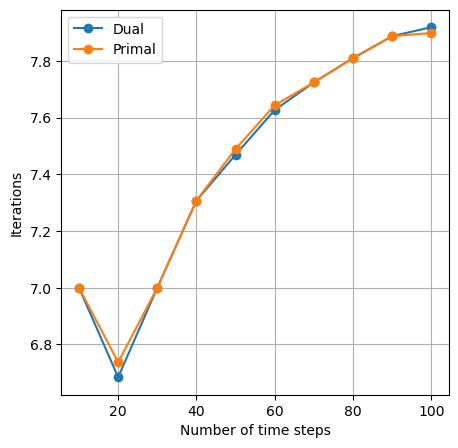

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for global_total_iterations, global_total_iterations in zip(global_total_iterationss, global_total_iterationss):
    for L_index, total_iterations in zip(L_indices, global_total_iterations):
        ax.plot([id+1 for id in ids], [total_iteration / id for total_iteration,id in zip(total_iterations, ids)], 'o-')

ax.legend(['Dual', 'Primal'])

ax.set_xlabel('Number of time steps')
ax.set_ylabel('Iterations')

ax.grid()

plt.savefig('L_scheme_iterations_per_dt.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


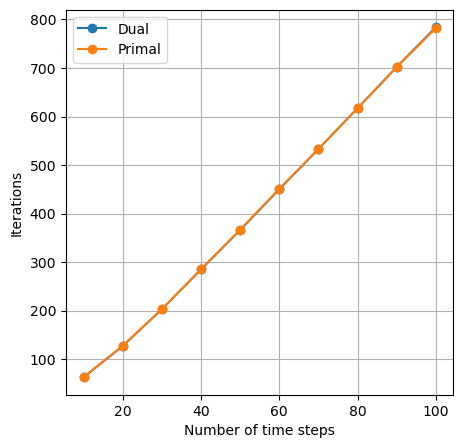

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

for global_total_iterations, global_total_iterations in zip(global_total_iterationss, global_total_iterationss):
    for L_index, total_iterations in zip(L_indices, global_total_iterations):
        ax.plot([id+1 for id in ids], total_iterations, 'o-')


ax.set_xlabel('Number of time steps')
ax.set_ylabel('Iterations')
ax.grid()
ax.legend(['Dual', 'Primal'])

plt.savefig('L_scheme_iterations_ts.eps', format='eps')